# Category-Wise Analysis

This notebook analyzes the scraped news articles based on the following categories:
- Politics
- Sports
- Business
- Tech
- Entertainment

## Analysis Metrics:
- Articles per category
- Average sentiment per category
- Average article length

## Visuals:
- Stacked bar chart (Sentiment Distribution)
- Category comparison table

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load Data
try:
    df = pd.read_csv('fetch_data_with_chunking.csv')
    print("Data loaded successfully. Categories found:", df['category'].unique())
except FileNotFoundError:
    # Fallback if running from a different directory depth, though user path suggests we are in Fetch_data_new
    df = pd.read_csv('Fetch_data_new/fetch_data_with_chunking.csv')

df.head()

Data loaded successfully. Categories found: ['General' 'National' 'International' 'Cities' 'Sport']


,url,headline,category,date,content,sentiment_score,sentiment_label
0,https://www.thehindu.com/opinion/lead/the-righ...,The right to disconnect in an ‘always-on’ econ...,General,2026-01-06,"In the digital age, our greatest tools of prod...",0.096066,Positive
1,https://www.thehindu.com/sci-tech/science/nitr...,The perfect flaw: how a diamond defect is chan...,General,2026-01-07,Imagine a diamond.You probably thought of a cl...,0.115856,Positive
2,https://www.thehindu.com/opinion/columns/crick...,BCCI vs BCB: Cricket is collateral damage in a...,General,2026-01-06,For so long has the Board of Control for Crick...,0.008144,Neutral
3,https://www.thehindu.com/sci-tech/health/healt...,Where health stands as the year beginsPremium,General,2026-01-06,"(In the weekly Health Matters newsletter,Zuded...",0.132451,Positive
4,https://www.thehindu.com/news/national/tamil-n...,"When eggs, stones were hurled at T.N. Governor...",National,2026-01-07,"Around 3 pm on April 10, 1995, Tamil Nadu Gove...",0.011636,Neutral


In [3]:
# Categorization Logic
def map_category(row):
    url = str(row['url']).lower()
    content = str(row['content']).lower()
    headline = str(row['headline']).lower()
    existing_cat = str(row['category']).lower()
    
    # Priority Mapping based on URL segments
    if 'sport' in url or 'cricket' in url or 'football' in url:
        return 'Sports'
    elif 'business' in url or 'economy' in url or 'market' in url:
        return 'Business'
    elif 'tech' in url or 'technology' in url or 'science' in url:
        return 'Tech'
    elif 'entertainment' in url or 'movie' in url or 'film' in url:
        return 'Entertainment'
    elif 'politics' in url or 'election' in url or 'government' in url or 'minister' in url:
        return 'Politics'
    
    # Content-based Fallback
    if 'politics' in content or 'election' in content or 'vote' in content:
        return 'Politics'
    elif 'sport' in content or 'match' in content or 'player' in content:
        return 'Sports'
    elif 'business' in content or 'stock' in content or 'revenue' in content:
        return 'Business'
    elif 'movie' in content or 'actor' in content or 'cinema' in content:
        return 'Entertainment'
    elif 'technology' in content or 'software' in content or 'device' in content:
        return 'Tech'
    
    return 'Other'

# Apply logic
df['Mapped_Category'] = df.apply(map_category, axis=1)

# Filter for target categories
target_categories = ['Politics', 'Sports', 'Business', 'Tech', 'Entertainment']
df_filtered = df[df['Mapped_Category'].isin(target_categories)].copy()

print("Distribution after mapping:")
print(df_filtered['Mapped_Category'].value_counts())

Distribution after mapping:
Mapped_Category
Politics    5
Business    2
Tech        2
Sports      2
Name: count, dtype: int64


In [4]:
# Calculate Article Length (Word Count)
df_filtered['Article_Length'] = df_filtered['content'].apply(lambda x: len(str(x).split()))

# Ensure Sentiment Score is numeric
df_filtered['sentiment_score'] = pd.to_numeric(df_filtered['sentiment_score'], errors='coerce')

df_filtered.head()

,url,headline,category,date,content,sentiment_score,sentiment_label,Mapped_Category,Article_Length
0,https://www.thehindu.com/opinion/lead/the-righ...,The right to disconnect in an ‘always-on’ econ...,General,2026-01-06,"In the digital age, our greatest tools of prod...",0.096066,Positive,Business,1261
1,https://www.thehindu.com/sci-tech/science/nitr...,The perfect flaw: how a diamond defect is chan...,General,2026-01-07,Imagine a diamond.You probably thought of a cl...,0.115856,Positive,Tech,990
2,https://www.thehindu.com/opinion/columns/crick...,BCCI vs BCB: Cricket is collateral damage in a...,General,2026-01-06,For so long has the Board of Control for Crick...,0.008144,Neutral,Sports,756
3,https://www.thehindu.com/sci-tech/health/healt...,Where health stands as the year beginsPremium,General,2026-01-06,"(In the weekly Health Matters newsletter,Zuded...",0.132451,Positive,Tech,1025
4,https://www.thehindu.com/news/national/tamil-n...,"When eggs, stones were hurled at T.N. Governor...",National,2026-01-07,"Around 3 pm on April 10, 1995, Tamil Nadu Gove...",0.011636,Neutral,Politics,938


## Category Comparison Table
Aggregating count, average sentiment, and average article length.

In [5]:
summary_table = df_filtered.groupby('Mapped_Category').agg(
    Articles_Count=('url', 'count'),
    Avg_Sentiment=('sentiment_score', 'mean'),
    Avg_Article_Length=('Article_Length', 'mean')
).reset_index()

# Formatting
summary_table['Avg_Sentiment'] = summary_table['Avg_Sentiment'].round(3)
summary_table['Avg_Article_Length'] = summary_table['Avg_Article_Length'].round(0).astype(int)

print("Category Comparison Table:")
display(summary_table)

Category Comparison Table:


,Mapped_Category,Articles_Count,Avg_Sentiment,Avg_Article_Length
0,Business,2,0.032,864
1,Politics,5,0.043,679
2,Sports,2,0.095,651
3,Tech,2,0.124,1008


## Visuals: Stacked Bar Chart
Visualizing the distribution of sentiment labels (positive, neutral, negative) across categories.

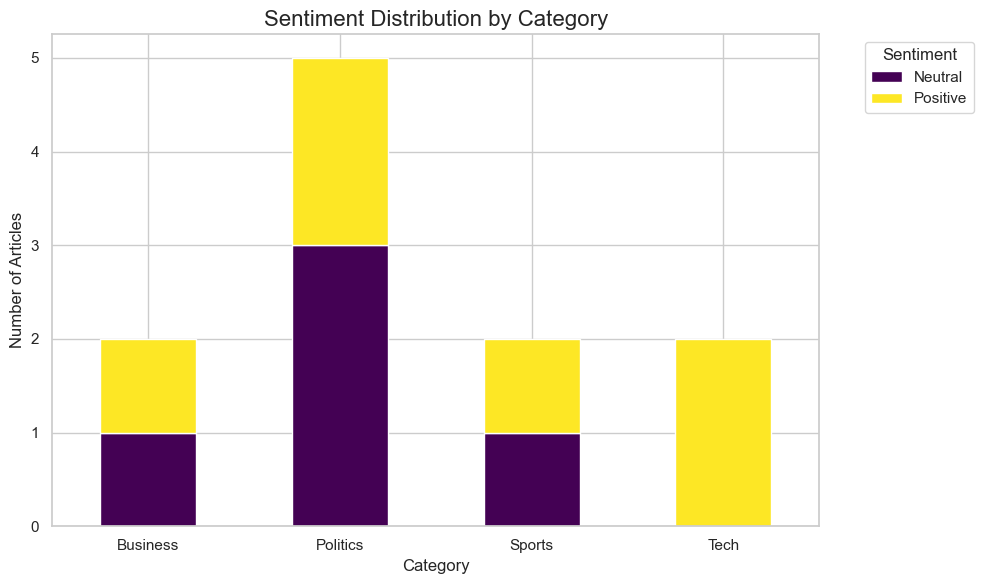

In [6]:
# Prepare data for Stacked Bar Chart
sentiment_counts = df_filtered.groupby(['Mapped_Category', 'sentiment_label']).size().unstack(fill_value=0)

# Plotting
ax = sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Sentiment Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Visuals: Metrics Comparison
Bar charts for Average Sentiment and Average Article Length.

C:\Users\abhis\AppData\Local\Temp\ipykernel_40004\1216909370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_table, x='Mapped_Category', y='Avg_Sentiment', ax=axes[0], palette='coolwarm')
C:\Users\abhis\AppData\Local\Temp\ipykernel_40004\1216909370.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_table, x='Mapped_Category', y='Avg_Article_Length', ax=axes[1], palette='magma')


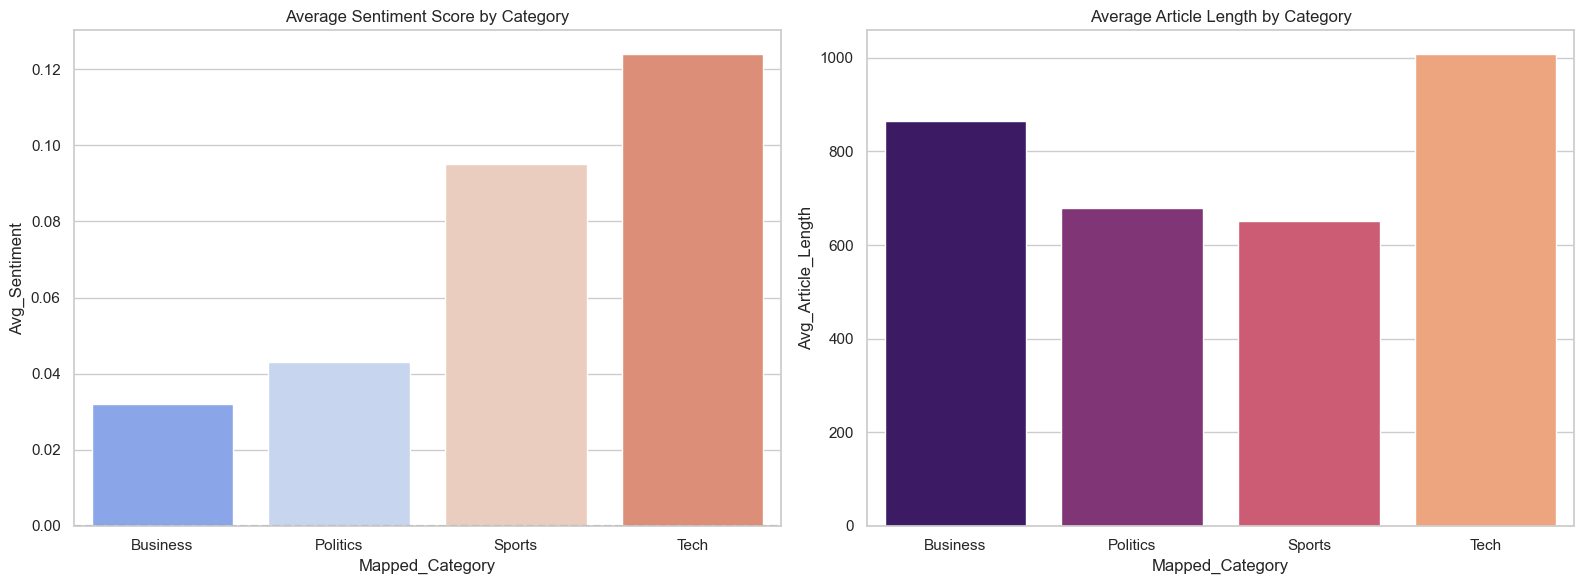

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Avg Sentiment
sns.barplot(data=summary_table, x='Mapped_Category', y='Avg_Sentiment', ax=axes[0], palette='coolwarm')
axes[0].set_title('Average Sentiment Score by Category')
axes[0].axhline(0, color='gray', linestyle='--')

# Avg Length
sns.barplot(data=summary_table, x='Mapped_Category', y='Avg_Article_Length', ax=axes[1], palette='magma')
axes[1].set_title('Average Article Length by Category')

plt.tight_layout()
plt.show()